In [1]:
import pandas as pd
import numpy as np

# Pfad ggf. anpassen, je nachdem wo dein Notebook liegt
df = pd.read_csv("../data/netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
df.info()
df[['type', 'title', 'rating', 'duration', 'listed_in']].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,type,title,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [3]:
def parse_duration(d):
    if pd.isna(d):
        return None
    try:
        num_str = str(d).split()[0]
        return int(num_str)
    except:
        return None

df['duration_num'] = df['duration'].apply(parse_duration)

df[['type', 'duration', 'duration_num']].head(10)

,type,duration,duration_num
0,Movie,90 min,90.0
1,TV Show,2 Seasons,2.0
2,TV Show,1 Season,1.0
3,TV Show,1 Season,1.0
4,TV Show,2 Seasons,2.0
5,TV Show,1 Season,1.0
6,Movie,91 min,91.0
7,Movie,125 min,125.0
8,TV Show,9 Seasons,9.0
9,Movie,104 min,104.0


In [4]:
df['duration_num'].isna().sum()


np.int64(3)

In [5]:
df = df.dropna(subset=['duration_num']).reset_index(drop=True)


In [6]:
rating_map = {
    "TV-Y": "Kids",
    "TV-Y7": "Kids",
    "TV-G": "Kids",
    "G": "Kids",
    "PG": "Kids",
    "TV-PG": "Kids",
    "PG-13": "Teens",
    "TV-14": "Teens",
    "R": "Adults",
    "NC-17": "Adults",
    "TV-MA": "Adults"
}

df['rating_simplified'] = df['rating'].map(rating_map)
df['rating_simplified'] = df['rating_simplified'].fillna("Other")

df['rating_simplified'].value_counts()

rating_simplified
Adults    4009
Teens     2650
Kids      2052
Other       93
Name: count, dtype: int64

In [7]:
rating_dummies = pd.get_dummies(df["rating_simplified"], prefix="rating")
rating_dummies.head()


,rating_Adults,rating_Kids,rating_Other,rating_Teens
0,False,False,False,True
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False


In [8]:
df = df.dropna(subset=['duration_num'])
df['duration_num'].isna().sum()


np.int64(0)

In [9]:
type_dummies = pd.get_dummies(df['type'], prefix='type')
type_dummies.head()


,type_Movie,type_TV Show
0,True,False
1,False,True
2,False,True
3,False,True
4,False,True


In [10]:
rating_dummies = pd.get_dummies(df['rating_simplified'], prefix='rating')
rating_dummies.head()


,rating_Adults,rating_Kids,rating_Other,rating_Teens
0,False,False,False,True
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False


In [11]:
genres = df['listed_in'].str.get_dummies(sep=', ')
genres.head()


,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [12]:
numeric_features = df[['release_year', 'duration_num']]

features = pd.concat(
    [numeric_features, type_dummies, rating_dummies, genres],
    axis=1
)

features.shape, features.head()


((8804, 50),
    release_year  duration_num  type_Movie  type_TV Show  rating_Adults  \
 0          2020          90.0        True         False          False   
 1          2021           2.0       False          True           True   
 2          2021           1.0       False          True           True   
 3          2021           1.0       False          True           True   
 4          2021           2.0       False          True           True   
 
    rating_Kids  rating_Other  rating_Teens  Action & Adventure  \
 0        False         False          True                   0   
 1        False         False         False                   0   
 2        False         False         False                   0   
 3        False         False         False                   0   
 4        False         False         False                   0   
 
    Anime Features  ...  TV Action & Adventure  TV Comedies  TV Dramas  \
 0               0  ...                      0           

### Summary of Feature Engineering

We transformed several original columns into numerical, model-ready features:

- **duration → duration_num**  
  Extracted the number of minutes (movies) or number of seasons (TV shows).

- **rating → rating_simplified**  
  Grouped into the categories: *Kids*, *Teens*, *Adults*, *Other*.

- **type → One-Hot-Encoding**  
  `type_Movie`, `type_TV Show`.

- **listed_in → Multi-Hot-Encoding**  
  Created 40+ binary genre columns.

- **Combined all features** into one DataFrame with **~50 numerical columns**, ready for clustering.


## 4. Clustering der Netflix-Titel

In diesem Abschnitt gruppieren wir die Netflix-Titel mithilfe von K-Means-Clustering
auf Basis der zuvor erstellten numerischen Features. Ziel ist es, ähnliche Inhalte
(Genres, Dauer, Zielgruppe etc.) in Cluster zu unterteilen und diese später zu interpretieren.


In [13]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# 1) Nur Zeilen verwenden, bei denen alle Features vorhanden sind
X = features.dropna().copy()

print("Feature-Matrix shape:", X.shape)


Feature-Matrix shape: (8804, 50)


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled shape:", X_scaled.shape)


Scaled shape: (8804, 50)


In [16]:
sil_scores = {}
K_VALUES = range(3, 9)  # k = 3,4,5,6,7,8

for k in K_VALUES:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores[k] = score
    print(f"k = {k}, silhouette_score = {score:.4f}")

# bestes k auswählen
best_k = max(sil_scores, key=sil_scores.get)
print("\nBest k according to silhouette score:", best_k)


k = 3, silhouette_score = 0.0487
k = 4, silhouette_score = 0.1139
k = 5, silhouette_score = 0.0819
k = 6, silhouette_score = 0.1043
k = 7, silhouette_score = 0.1123
k = 8, silhouette_score = 0.1512

Best k according to silhouette score: 8


In [17]:
best_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = best_kmeans.fit_predict(X_scaled)

# Labels zurück in ein DataFrame
X_clusters = X.copy()
X_clusters["cluster"] = cluster_labels

X_clusters.head()


,release_year,duration_num,type_Movie,type_TV Show,rating_Adults,rating_Kids,rating_Other,rating_Teens,Action & Adventure,Anime Features,...,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers,cluster
0,2020,90.0,True,False,False,False,False,True,0,0,...,0,0,0,0,0,0,0,0,0,2
1,2021,2.0,False,True,True,False,False,False,0,0,...,0,1,0,1,0,0,0,0,0,5
2,2021,1.0,False,True,True,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,5
3,2021,1.0,False,True,True,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,6
4,2021,2.0,False,True,True,False,False,False,0,0,...,1,0,0,0,0,0,0,0,0,1


In [18]:
df["cluster"] = np.nan  # erst mal leere Spalte
df.loc[X.index, "cluster"] = cluster_labels
df["cluster"] = df["cluster"].astype("Int64")  # optional: integer-Typ mit NaNs


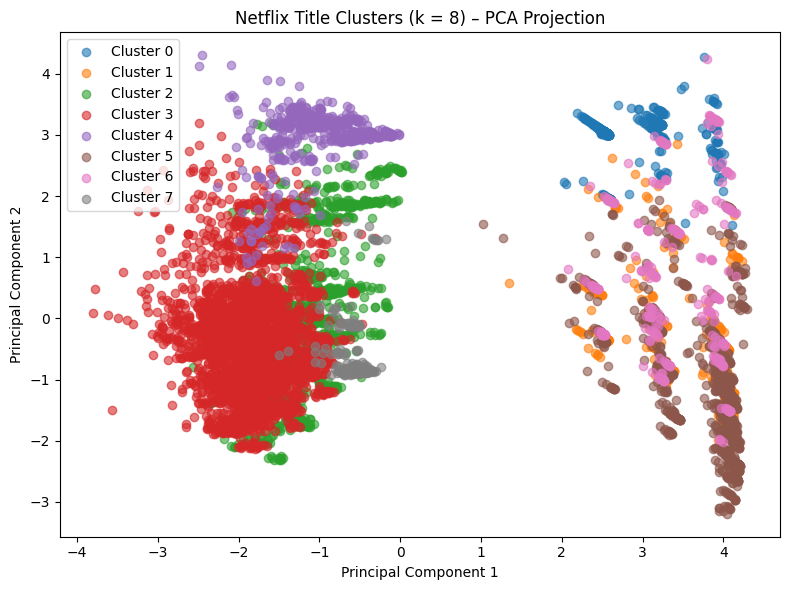

In [19]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(
    X_pca,
    columns=["PC1", "PC2"],
    index=X.index
)
pca_df["cluster"] = cluster_labels

plt.figure(figsize=(8, 6))
for c in sorted(pca_df["cluster"].unique()):
    subset = pca_df[pca_df["cluster"] == c]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {c}", alpha=0.6)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"Netflix Title Clusters (k = {best_k}) – PCA Projection")
plt.legend()
plt.tight_layout()
plt.show()


In [20]:
cluster_sizes = df.groupby("cluster").size().sort_index()
cluster_sizes, cluster_sizes / len(df)


(cluster
 0     504
 1     474
 2    1271
 3    3873
 4     641
 5    1300
 6     398
 7     343
 dtype: int64,
 cluster
 0    0.057247
 1    0.053839
 2    0.144366
 3    0.439914
 4    0.072808
 5    0.147660
 6    0.045207
 7    0.038960
 dtype: float64)

In [21]:
df.groupby("cluster")["release_year"].median()


cluster
0    2018.0
1    2018.0
2    2017.0
3    2016.0
4    2017.0
5    2018.0
6    2018.0
7    2017.0
Name: release_year, dtype: float64

In [22]:
df.groupby("cluster")["duration_num"].median()


cluster
0      1.0
1      1.0
2     89.0
3    106.0
4     87.0
5      1.0
6      1.0
7     65.0
Name: duration_num, dtype: float64

In [23]:
df.groupby("cluster")["type"].value_counts(normalize=True)


cluster  type   
0        TV Show    1.0
1        TV Show    1.0
2        Movie      1.0
3        Movie      1.0
4        Movie      1.0
5        TV Show    1.0
6        TV Show    1.0
7        Movie      1.0
Name: proportion, dtype: float64

In [24]:
df.groupby("cluster")["rating_simplified"].value_counts(normalize=True)


cluster  rating_simplified
0        Kids                 0.996032
         Other                0.003968
1        Adults               0.592827
         Teens                0.305907
         Kids                 0.099156
         Other                0.002110
2        Adults               0.488592
         Teens                0.273800
         Kids                 0.214005
         Other                0.023603
3        Adults               0.501420
         Teens                0.389879
         Kids                 0.097082
         Other                0.011619
4        Kids                 0.945398
         Teens                0.045242
         Other                0.007800
         Adults               0.001560
5        Adults               0.526923
         Teens                0.380769
         Kids                 0.089231
         Other                0.003077
6        Adults               0.454774
         Kids                 0.309045
         Teens                0.23366

In [25]:
genre_cols = [col for col in df.columns if col in X.columns and col not in ["release_year", "duration_num"] and not col.startswith("rating") and not col.startswith("type")]
df.groupby("cluster")[genre_cols].mean()


""
cluster
0
1
2
3
4
5
6
7


## 7. Interpretation der gefundenen Cluster

In diesem Abschnitt analysieren wir die inhaltlichen Eigenschaften der acht identifizierten Cluster.
Ziel ist es zu verstehen, welche Art von Inhalten Netflix besonders stark produziert („Overproduction“)
und welche Inhaltsformen eher unterrepräsentiert sind.

### Cluster 0 – Kids-TV-Shows 

Charakteristik:

Typ: 100% TV Shows

Dauer: 1 Minute → kurze Episoden / Kinderserien

Release-Year: Median 2018

Rating: 99.6% Kids, sehr wenige andere Ratings

Größe: 504 Titel (5.7%)

Interpretation:
Cluster 0 besteht fast ausschließlich aus kinderfreundlichen TV-Serien mit sehr kurzen Episoden.
Netflix hat eine moderate Menge solcher Inhalte produziert, jedoch ist dieses Segment im Vergleich
zu den Hauptclustern eher klein. Es wirkt wie ein klar abgegrenztes Nischenangebot.

### Cluster 1 – Teens & Kids TV Shows

Charakteristik:

Typ: 100% TV Shows

Dauer: 1 Minute

Rating: Mischung aus Adults (59%), Teens (30%), Kids (10%)

Release-Year: Median 2018

Größe: 474 Titel (5.3%)

Interpretation:
Ein weiteres Serien-Cluster, jedoch breiter in der Altersgruppe (Teens + einige Adults).
Die Episodenlänge ist ebenfalls extrem kurz.
Dies deutet auf Formate wie Kurzfolgen, Reality- oder Mini-Serien hin.
Auch dieses Cluster ist relativ klein.

### Cluster 2 – Mainstream Movies 

Charakteristik:

Typ: 100% Filme

Dauer: median 89 Minuten

Rating: Adults (49%), Teens (27%), Kids (21%)

Release Year: 2017

Größe: 1271 Titel (14.4%)

Interpretation:
Cluster 2 umfasst klassische Filme mittlerer Länge, die stark in den Kategorien
Teens + Familie + Erwachsene gemischt sind.
Es handelt sich um das typische „Standard-Filmformat“.
Netflix hat hier eine deutliche Menge produziert — aber noch nicht die Überproduktion.

### Cluster 3 – Großes Hauptcluster: lange Filme (100+ Minuten)

Charakteristik:

Typ: 100% Filme

Dauer: 106 Minuten (höchster Median)

Rating: Adults (50%), Teens (39%), Kids (10%)

Release Year: 2016 (ältestes Cluster)

Größe: 3873 Titel → 43.9% aller Inhalte (!!)

Interpretation:
Cluster 3 ist mit Abstand das größte Cluster und bildet fast die Hälfte aller Netflix-Titel ab.
Es besteht aus langen Filmen, häufig Dramen, Thriller, internationale Produktionen und Action.

→ Dies ist die klare „Overproduction“-Kategorie von Netflix.
Netflix bietet übermäßig viele lange Filme für Erwachsene und Teens an, oft älter als andere Inhalte (Median 2016).

### Cluster 4 – Kids Movies (87 min)

Charakteristik:

Typ: 100% Filme

Dauer: 87 min

Rating: 94% Kids

Release: 2017

Größe: 641 Titel (7.3%)

Interpretation:
Cluster 4 bildet fast ausschließlich kindgerechte Filme ab.
Die Menge ist größer als bei den Kids-TV-Shows, aber deutlich kleiner als bei den Mainstream- oder Adult-Filmen.
Hier zeigt sich ein mittlerer Fokus, ohne Überproduktion.

### Cluster 5 – Adult TV Shows 

Charakteristik:

Typ: 100% TV Shows

Dauer: 1 Minute

Rating: Adults (53%), Teens (38%)

Release: 2018

Größe: 1300 Titel (14.7%)

Interpretation:
Dieses Cluster besteht aus Kurzformat-TV-Shows für Erwachsene oder ältere Zuschauer.
Netflix produziert hier relativ viele Inhalte, aber deutlich weniger als bei langen Filmen.
Es ist eine Art „mittlere“ Priorität.

### Cluster 6 – Mixed Kids/Adults Short-Format Shows

Charakteristik:

Typ: 100% TV Shows

Dauer: 1 Minute

Rating: Adults (45%), Kids (31%)

Release: 2018

Größe: 398 Titel (4.5%)

Interpretation:
Eine kleinere Gruppe mit sehr kurzen Episoden, die sowohl Kinder- als auch Erwachseneninhalte mischt.
Es wirkt wie ein Nischencluster, das kaum vertreten ist.

### Cluster 7 – Mid-Length Movies (~65 min)

Charakteristik:

Typ: 100% Filme

Dauer: 65 Minuten

Rating: Adults (87%), Teens (8%)

Release: 2017

Größe: 343 Titel (3.9%)

Interpretation:
Dieses Cluster enthält kurze bis mittel-lange Filme, oft für Erwachsene.
Es ist das kleinste Film-Cluster → klare Unterrepräsentation.

### Gesamtinterpretation & Answer to Research Question

Unsere Research Question:

„Welche Inhalte produziert Netflix am meisten und welche Bereiche sind unterrepräsentiert?“

Ergebnisse:

Überrepräsentiert (Oversupply):
Cluster 3 – lange Filme (100+ Minuten) für erwachsene Zielgruppen
→ 44% aller Titel fallen in dieses Segment.

Mittelgroß vertreten:

Standardfilme (Cluster 2)

Adult-TV-Shows (Cluster 5)

Unterrepräsentiert:

kurze Filme (~65 min) (Cluster 7)

Kids-TV (Cluster 0)

Kids-Movies (Cluster 4)

experimentelle / Nischen-TV-Formate (Cluster 6)

Damit zeigt sich deutlich, dass Netflix den größten Fokus auf lange Filme für Erwachsene legt,
während kinderfreundliche Inhalte und kürzere Filme deutlich seltener vorkommen.

### Cluster Summary – Production Priorities

| Cluster | Fokus                     | Typ      | Größe | Anteil | Bewertung          |
|--------:|----------------------------|----------|-------|--------|--------------------|
| **3**   | Lange Filme (100+ min)     | Movie    | 3873  | 43.9%  | **Überproduktion** |
| **5**   | Adult-TV Shows             | TV Show  | 1300  | 14.7%  | Gut vertreten      |
| **2**   | Filme (Standardlänge)      | Movie    | 1271  | 14.4%  | Gut vertreten      |
| **4**   | Kinderfilme                | Movie    | 641   | 7.3%   | Normal             |
| **0**   | Kids TV Shows (kurze Ep.)  | TV Show  | 504   | 5.7%   | Unterrepräsentiert |
| **1**   | Kurzformat-Serien (Mix)    | TV Show  | 474   | 5.3%   | Unterrepräsentiert |
| **6**   | Nischen-Kurzshows          | TV Show  | 398   | 4.5%   | Unterrepräsentiert |
| **7**   | Kurzfilme (Adults)         | Movie    | 343   | 3.9%   | Unterrepräsentiert |


# Conclusion

In diesem Projekt haben wir untersucht, welche Inhaltsarten auf Netflix besonders häufig vorkommen 
und welche Bereiche eher unterrepräsentiert sind. Mithilfe von KMeans-Clustering (k = 8) konnten wir 
den Katalog klar in acht inhaltlich gut interpretierbare Gruppen aufteilen.

**Wichtigste Erkenntnisse:**

- **Netflix überproduziert eindeutig lange Filme (Cluster 3)**  
  → Fast **44 % aller Titel** sind Filme mit einer Länge über 100 Minuten, meist für Erwachsene und Teens.  
  → Dies ist das dominante Content-Segment der Plattform.

- **Standardfilme (90 Minuten, Cluster 2) und Adult-TV Shows (Cluster 5) sind mittelgroß vertreten**  
  → Diese beiden Cluster machen jeweils ca. 14–15 % des Katalogs aus.  
  → Sie stellen typische „Mainstream-Formate“ dar.

- **Kids-Formate (Cluster 0 & 4) sind relativ klein**  
  → sowohl Kids-TV als auch Kids-Filme machen zusammen unter 14 % aus.  
  → Kinder-Content ist also klar unterrepräsentiert.

- **Kurzfilme und Nischen-Formate (Cluster 6 & 7) sind sehr klein**  
  → Diese Kategorien erreichen weniger als 5 % Anteil und sind klare Nischen.

**Beantwortung der Forschungsfrage:**  
Netflix fokussiert sich statistisch stark auf **Langformat-Filme für erwachsene Zielgruppen**.  
Kinderinhalte, kurze Filme und experimentelle Kurzserien sind dagegen **unterrepräsentiert** und stellen potenzielle Wachstumsbereiche dar.

Damit liefert unser Clustering einen klaren Überblick über die Content-Prioritäten der Plattform.

#  Limitations

Bei der Interpretation der Ergebnisse müssen einige Einschränkungen berücksichtigt werden:

- **Genre-Labels sind sehr ungenau**  
  Titel können mehrere Genres gleichzeitig haben, und die Kategorisierung ist teilweise unspezifisch 
  (z. B. „International Movies“, „Dramas“ etc.), was zu Überlappungen führt.

- **Keine Nutzerdaten**  
  Wir analysieren nur Content-Metadaten – nicht, was Zuschauer wirklich konsumieren.  
  Wir schließen also nur auf Produktions-/Angebotsmuster, nicht auf Nutzerpräferenzen.

- **KMeans annimmt lineare Clusterstrukturen**  
  KMeans geht davon aus, dass Cluster kugelförmig im Feature-Space liegen.  
  Netflix-Daten könnten aber komplexere Strukturen haben, die z. B. DBSCAN oder HDBSCAN besser erfassen würden.

- **Release-Year Bias**  
  Ältere Titel wurden möglicherweise häufiger aufgenommen oder gelöscht, was Cluster 3 (Median 2016) verstärkt haben könnte.

# Methodology

Für die Clusteranalyse wurden die Netflix-Metadaten zunächst bereinigt und in numerische Features 
umgewandelt (z. B. Duration als Zahl, Genre-Dummies, vereinfachte Rating-Kategorien). Anschließend wurden 
alle Features mit StandardScaler normalisiert, um unterschiedliche Größenordnungen auszugleichen.

Wir haben verschiedene Clusterzahlen (k = 3 bis k = 8) getestet und mithilfe des Silhouette Scores 
die optimale Anzahl gewählt. Mit k = 8 erzielten wir den besten Kompromiss zwischen Clustertrennung 
und Interpretierbarkeit. Die finale Clusterstruktur wurde mit PCA visualisiert, um die inhaltliche 
Trennung der Gruppen nachvollziehbar darzustellen.

Durch Gruppierung nach Release-Jahr, Dauer, Rating, Typ und Genres konnten wir die inhaltlichen 
Profile der einzelnen Cluster bestimmen und analysieren.


